In [1]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [2]:
data=pd.read_csv("Advanced Soybean Agricultural Dataset.csv")
data.head(5)

,Parameters,Random,Plant Height (PH),Number of Pods (NP),Biological Weight (BW),Sugars (Su),Relative Water Content in Leaves (RWCL),ChlorophyllA663,Chlorophyllb649,Protein Percentage (PPE),Weight of 300 Seeds (W3S),Leaf Area Index (LAI),Seed Yield per Unit Area (SYUA),Number of Seeds per Pod (NSP),Protein Content (PCO)
0,C1S1G5,R1,50.5,130.3,111.0,0.433,0.732,1.4,3.1,33.2,33.6,0.08,5567.4,1.86,0.82
1,C2S3G4,R1,44.5,132.0,80.0,0.334,0.674,7.1,2.2,38.5,34.4,0.09,2245.5,1.87,0.13
2,C2S1G6,R1,52.2,150.0,83.0,0.490,0.677,1.8,1.3,33.6,35.2,0.07,4326.7,2.04,0.15
3,C1S1G1,R1,50.5,140.8,66.0,0.163,0.745,1.1,3.0,33.5,52.3,0.09,6214.5,2.20,0.14
4,C1S2G6,R2,49.2,175.6,73.0,0.795,0.725,7.5,2.1,39.6,31.2,0.10,3897.8,1.88,0.60


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55450 entries, 0 to 55449
Data columns (total 15 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   Parameters                               55450 non-null  object 
 1   Random                                   55450 non-null  object 
 2   Plant Height (PH)                        55450 non-null  float64
 3   Number of Pods (NP)                      55450 non-null  float64
 4   Biological Weight (BW)                   55450 non-null  float64
 5   Sugars (Su)                              55450 non-null  float64
 6   Relative Water Content in Leaves (RWCL)  55450 non-null  float64
 7   ChlorophyllA663                          55450 non-null  float64
 8   Chlorophyllb649                          55450 non-null  float64
 9   Protein Percentage (PPE)                 55450 non-null  float64
 10  Weight of 300 Seeds (W3S)                55450

In [4]:
data.describe()

,Plant Height (PH),Number of Pods (NP),Biological Weight (BW),Sugars (Su),Relative Water Content in Leaves (RWCL),ChlorophyllA663,Chlorophyllb649,Protein Percentage (PPE),Weight of 300 Seeds (W3S),Leaf Area Index (LAI),Seed Yield per Unit Area (SYUA),Number of Seeds per Pod (NSP),Protein Content (PCO)
count,55450.000000,55450.000000,55450.000000,55450.000000,55450.000000,55450.000000,55450.000000,55450.000000,55450.000000,55450.000000,55450.000000,55450.000000,55450.000000
mean,49.959392,144.938979,114.533886,0.477543,0.673621,3.937670,2.399096,36.042123,35.349129,0.072132,4388.525773,2.020076,0.507610
std,3.052315,20.015994,48.925533,0.236294,0.084515,2.846317,1.187323,2.417205,4.999200,0.022278,1251.490529,0.245889,0.287548
min,40.400000,75.000000,32.000000,0.161000,0.434000,1.000000,1.100000,31.100000,26.400000,0.020000,2127.500000,1.400000,0.120000
25%,49.200000,131.400000,80.000000,0.295000,0.632250,1.500000,1.300000,33.600000,32.200000,0.060000,3352.200000,1.850000,0.330000
50%,50.300000,147.000000,102.000000,0.466000,0.677000,2.300000,2.200000,36.600000,34.500000,0.080000,4300.700000,2.050000,0.480000
75%,52.000000,158.000000,133.000000,0.612000,0.722000,6.700000,3.100000,38.000000,37.200000,0.090000,5233.500000,2.200000,0.600000
max,55.700000,218.000000,236.000000,1.115000,0.875000,10.200000,7.800000,39.900000,53.900000,0.100000,7841.500000,2.600000,1.800000


In [5]:
data.isnull().sum()

Parameters                                 0
Random                                     0
Plant Height (PH)                          0
Number of Pods (NP)                        0
Biological Weight (BW)                     0
Sugars (Su)                                0
Relative Water Content in Leaves (RWCL)    0
ChlorophyllA663                            0
Chlorophyllb649                            0
Protein Percentage (PPE)                   0
Weight of 300 Seeds (W3S)                  0
Leaf Area Index (LAI)                      0
Seed Yield per Unit Area (SYUA)            0
Number of Seeds per Pod (NSP)              0
Protein Content (PCO)                      0
dtype: int64

In [6]:
data.columns

Index(['Parameters', 'Random ', 'Plant Height (PH)', 'Number of Pods (NP)',
       'Biological Weight (BW)', 'Sugars (Su)',
       'Relative Water Content in Leaves (RWCL)', 'ChlorophyllA663',
       'Chlorophyllb649', 'Protein Percentage (PPE)',
       'Weight of 300 Seeds (W3S)', 'Leaf Area Index (LAI)',
       'Seed Yield per Unit Area (SYUA)', 'Number of Seeds per Pod (NSP)',
       'Protein Content (PCO)'],
      dtype='object')

In [7]:
df_numeric = data.drop(columns=["Random ","Parameters"])
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_numeric)

In [8]:

wcss = []

for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(df_scaled)
    wcss.append(kmeans.inertia_)


# Elbow Method

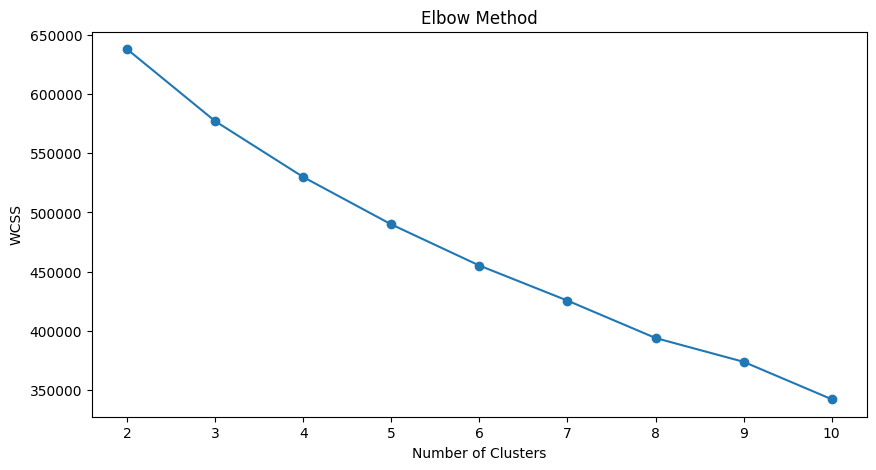

In [9]:
plt.figure(figsize=(10, 5))
plt.plot(range(2, 11), wcss, marker="o")
plt.xlabel("Number of Clusters")
plt.ylabel("WCSS")
plt.title("Elbow Method")
plt.show()

In [23]:
optimal_k = 3
kmeans = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
data["Cluster"] = kmeans.fit_predict(df_scaled)

print(data.head())


  Parameters Random   Plant Height (PH)  Number of Pods (NP)  \
0     C1S1G5      R1               50.5                130.3   
1     C2S3G4      R1               44.5                132.0   
2     C2S1G6      R1               52.2                150.0   
3     C1S1G1      R1               50.5                140.8   
4     C1S2G6      R2               49.2                175.6   

   Biological Weight (BW)  Sugars (Su)  \
0                   111.0        0.433   
1                    80.0        0.334   
2                    83.0        0.490   
3                    66.0        0.163   
4                    73.0        0.795   

   Relative Water Content in Leaves (RWCL)  ChlorophyllA663  Chlorophyllb649  \
0                                    0.732              1.4              3.1   
1                                    0.674              7.1              2.2   
2                                    0.677              1.8              1.3   
3                                    0.745

# PCA 

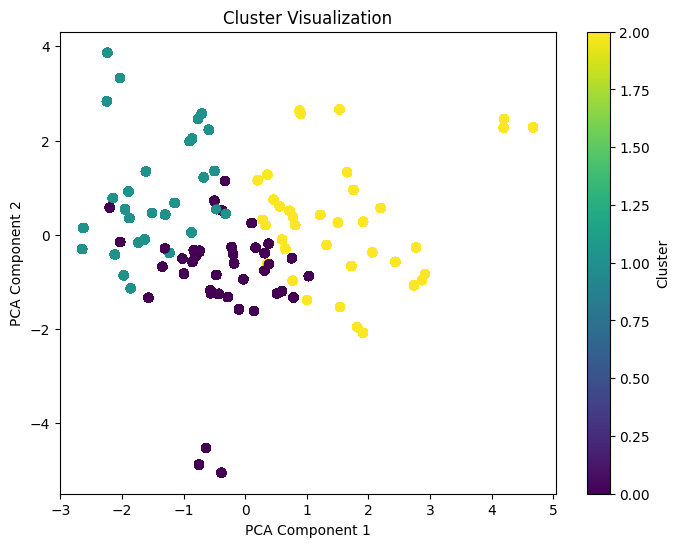

In [24]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
pca_data = pca.fit_transform(df_scaled)

plt.figure(figsize=(8, 6))
plt.scatter(pca_data[:, 0], pca_data[:, 1], c=data["Cluster"], cmap="viridis")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.title("Cluster Visualization")
plt.colorbar(label="Cluster")
plt.show()


# If you like my notebook please dont Forget to UPVOTE ! 